# Data Description
The four attached json files (sub_basketball.json, sub_machinelearning.json, sub_personalfinance.json, sub_louisville.json), represent four separate classes of top 100 submissions from subreddits with the corresponding suffix.  For example, sub_basketball.json has the top 100 submissions taken from the basketball subreddit.
Each submission has up to 5 characteristics (stored as key-value pairs): Title, id, Score, Num_Comments, Date*. 
* Many submissions are missing one or more these characteristics: see instructions below.

# Instructions (Five parts in total)

## Part 1. 
Load each json file into Python (dictionaries or data-frames are recommended) and perform the following:
    a. discard any submissions that lack one or more of the 5 characteristics (DataFrames may require finesse here)
    b.after doing so, discard the id characteristic, as it will not be used with future tasks.
    
For each collection, save the modified list of submissions back into a new json file with the name prep_class#.json, where # matches the order of json files cited above (0=…basketball, 1= …machinelearning, 2=...personalfinance, 3=…louisville).  You should have files prep_class0.json, prep_class1.json, prep_class2.json, and prep_class3.json at the end of the process, all of which have the modified submissions.



In [9]:
import pandas as pd
import json

fnames = ['sub_basketball.json', 'sub_louisville.json', 'sub_machinelearning.json', 'sub_personalfinance.json']

data = []
data_df=[]
for i, file in enumerate(fnames):
    with open(file,'r') as f:
        data.append(json.load(f))
        data_df.append(pd.DataFrame(data[i]))
        data_df[i].dropna(subset=['Title', 'id', 'Score', 'Num_Comments', 'Date'], inplace=True)
        data_df[i].drop(columns=['id'], inplace=True)
        modified_fname = f'prep_class{i}.json'
        with open(modified_fname, 'w') as f:
            json.dump(data_df[i].to_dict(orient='records'), f)
            print(f"Modified submissions saved {len(data_df[i])} records  to {modified_fname}")
            

Modified submissions saved 96 records  to prep_class0.json
Modified submissions saved 96 records  to prep_class1.json
Modified submissions saved 97 records  to prep_class2.json
Modified submissions saved 98 records  to prep_class3.json


## Part 2. 

For each modified collection of submissions (i.e. after the transformation from part 1) use textblob to calculate the sentiment polarity of each submission’s title (ignore the subjectivity, and don’t use the NaiveBayesAnalyzer)  Create a 2x2 (subplot) grid of bar plots, where each bar plot includes the # submissions per subreddit that have negative (polarity<-0.25), neutral (-0.25≤polarity≤0.25) , and positive (polarity>0.25) sentiment.  You should have 3 bars per plot (one bar for negative, one for neutral, one for positive), and 4 bar plots total (one per subreddit).

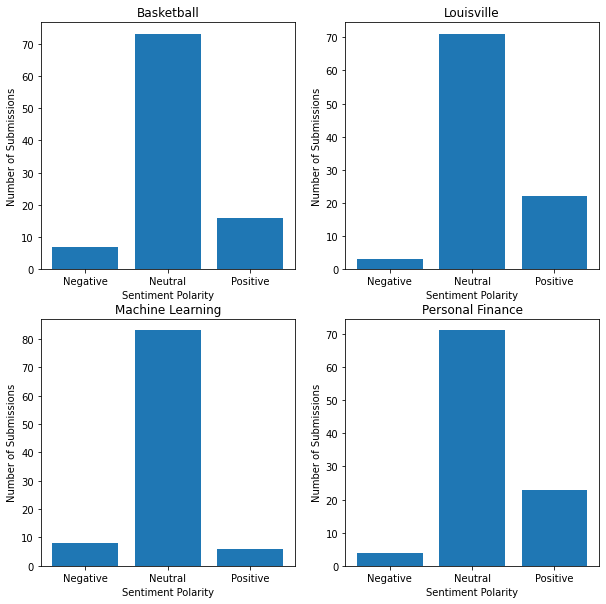

Text(0.5, 0.98, 'Sentiment Analysis of Submission Titles')

In [2]:
import pandas as pd
import json
from textblob import TextBlob
import matplotlib.pyplot as plt

def polarity_value(title):
    return TextBlob(title).sentiment.polarity


fnames = ['prep_class0.json', 'prep_class1.json', 'prep_class2.json', 'prep_class3.json']
subreddit = ['Basketball', 'Louisville', 'Machine Learning', 'Personal Finance']
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, file in enumerate(fnames):
    with open(file,'r') as f:
        data=json.load(f)
        data_df=pd.DataFrame(data)
        data_df['polarity'] = data_df['Title'].apply(polarity_value)
        plt.subplot(2,2,i+1)
        counts = data_df['polarity'].value_counts(bins=3) 
        plt.bar(['Negative', 'Neutral', 'Positive'], counts.sort_index().values)
        plt.ylabel('Number of Submissions')
        plt.xlabel('Sentiment Polarity')
        plt.title(subreddit[i])
        
plt.show()       
fig.suptitle('Sentiment Analysis of Submission Titles')



## Part 3. 

Pool together all modified submissions into a single collection (list, DataFrame, etc.) , but maintain a combined secondary list that labels each submission by its class (0, 1, 2, or 3).  Ex: If there are 96 submissions from the basketball subreddit in the pooled list of tweets, the first 96 elements of the secondary list should be 0.    

In [3]:
fnames = ['prep_class0.json', 'prep_class1.json', 'prep_class2.json', 'prep_class3.json']
pooled_subs=[]
class_list=[]
for i, file in enumerate(fnames):
    with open(file,'r') as f:
        data=json.load(f)
        #data_df=pd.DataFrame(data)
        pooled_subs=pooled_subs+data
        class_list = class_list+[i] * len(data) 
        
print(class_list)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

## Part 4. 

Assume your combined collections have a length of n submissions in total.  Your next goal is to construct a n x 5 numpy feature array suited for machine learning, where each array row matches the corresponding index in your collections, and the 5 array columns represent the features for the submission at that position as follows:
Feature 1: The character length of the submission’s title.
Feature 2: The sentiment of the submission’s title.
Feature 3: The submission’s Score
Feature 4: The submission’s number of comments (Num_Comments).
Feature 5: The year of the submission (note that if you are reading your json file into a DataFrame, you may want to look into using convert_dates=False, as it may make producing this feature easier.)
For example, the first row in your feature array may look like the below:
[46.   ,  -0.2   , 1356.0 ,  249.0, 2020.   ]


In [4]:
import numpy as np
import json
from textblob import TextBlob

n = len(pooled_subs)
feature = np.zeros((n, 5))

# Setting the Features for each submission
for i, submission in enumerate(pooled_subs):    
    feature[i, 0] = len(submission['Title'])
    feature[i, 1] = TextBlob(submission['Title']).sentiment.polarity
    feature[i, 2] = submission['Score']
    feature[i, 3] = submission['Num_Comments']
    feature[i, 4] = int(submission['Date'].split('/')[2])
    print("[{:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}]".format(feature[i, 0],feature[i, 1],feature[i, 2],feature[i, 3],feature[i, 4]))


[46.00, -0.20, 1356.00, 249.00, 2020.00]
[21.00, 0.00, 717.00, 103.00, 2022.00]
[10.00, 0.35, 584.00, 13.00, 2017.00]
[25.00, 0.00, 504.00, 17.00, 2019.00]
[68.00, 0.00, 505.00, 26.00, 2019.00]
[24.00, 0.00, 474.00, 15.00, 2019.00]
[9.00, 0.00, 459.00, 10.00, 2017.00]
[5.00, -1.00, 403.00, 21.00, 2019.00]
[85.00, -0.50, 390.00, 22.00, 2021.00]
[24.00, 0.10, 369.00, 55.00, 2020.00]
[222.00, 0.50, 343.00, 41.00, 2022.00]
[43.00, 0.00, 313.00, 14.00, 2019.00]
[23.00, -0.10, 309.00, 22.00, 2020.00]
[118.00, 0.00, 305.00, 15.00, 2019.00]
[20.00, 0.00, 293.00, 107.00, 2021.00]
[10.00, 0.00, 292.00, 25.00, 2022.00]
[20.00, 0.00, 286.00, 82.00, 2019.00]
[22.00, 0.00, 283.00, 18.00, 2020.00]
[145.00, 0.43, 280.00, 118.00, 2021.00]
[97.00, 0.25, 261.00, 51.00, 2020.00]
[70.00, 0.00, 255.00, 11.00, 2020.00]
[63.00, 0.00, 252.00, 26.00, 2020.00]
[59.00, -0.40, 247.00, 41.00, 2019.00]
[60.00, 0.00, 233.00, 8.00, 2022.00]
[36.00, 0.49, 229.00, 29.00, 2019.00]
[92.00, 0.50, 230.00, 14.00, 2021.00]
[2

## Part 5. 

Convert your secondary list of classes into a 1D array, and then perform 10-fold cross-validation using two distinct classification estimators (either the ones we used in class, or those of your own choosing) to determine the accuracy available in using the features from part 4 in predicting the class of a given submission.  For full credit, you should produce both classifier accuracies and a confusion matrix for the most accurate classifier (in similar vein to Part 1 of HW 4) .  Write a paragraph (comments or a separate text file are fine for this) discussing whether or not you think the features and chosen classifiers provide acceptable accuracy for the task.

K Nearest Neighbors  Classifier Accuracy: 0.9328165374677002
Support Vector Machine  Classifier Accuracy: 0.9405684754521964
Gaussian Naive Bayes  Classifier Accuracy: 0.8733850129198967
Support Vector Machine  Is The Best Classifier With Accuracy( 0.9405684754521964 ):
Confusion Matrix of the Best Classifier: Support Vector Machine


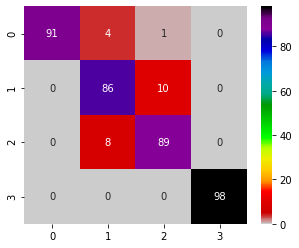

In [5]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert secondary list of classes into 1D array
lebels = np.array(class_list)

predictions=[]
accuracy=[]
classifiers = {
    'K Nearest Neighbors': knn(), 
    'Support Vector Machine': SVC(kernel='linear'),
    'Gaussian Naive Bayes': GaussianNB()}

# Define and perform first classification method
i=0
for classifier_name, classifier_method in classifiers.items():
    predictions.append(cross_val_predict(classifier_method, feature, lebels, cv=10))
    accuracy.append(np.mean(predictions[i] == lebels))
    print(classifier_name," Classifier Accuracy:",accuracy[i])
    i+=1

    
# Generate confusion matrix for most accurate classifier
best_classifier = accuracy.index(max(accuracy))
conf_matrix = confusion_matrix(lebels, predictions[best_classifier])
best_classifier_name=list(classifiers.keys())[best_classifier]
print(best_classifier_name," Is The Best Classifier With Accuracy(", accuracy[best_classifier],"):")
print("Confusion Matrix of the Best Classifier:", best_classifier_name)
confusion_fr = pd.DataFrame(conf_matrix, index=range(4), columns=range(4))
figure = plt.figure(figsize=(5, 4))
axes = sns.heatmap(confusion_fr, annot=True, 
                   cmap='nipy_spectral_r')


## Accuracy Analysis:
Based on the given classifier accuracies, it appears that the Support Vector Machine (SVM) classifier provides the highest accuracy of 0.940, followed by the K Nearest Neighbors (KNN) classifier with an accuracy of 0.933, and the Gaussian Naive Bayes (GNB) classifier with an accuracy of 0.873.

Whether or not these accuracies are acceptable for the task depends on the  the context of the task at hand and its requirements. I beleive that an accuracy of 0.9 or higher is considered acceptable for reddit submission classification, partivularly based on the few number of features we selected for classifications.  

## Confusion Matrix Analysis:
According to the confusion matrix, the Personal Finance class has been classified with 100% accuracy, which indicates high performance of the classification model for this class. However, the Louisville and Machine Learning classes appear to be causing some confusion. Specifically, eight Machine Learning submissions have been incorrectly classified as Louisville, while ten Louisville submissions have been classified as Machine Learning. Additionally, in the Basketball class, four submissions have been erroneously grouped with Louisville, while one submission has been classified as Machine Learning, despite belonging to the Basketball class. No misclassification has been observed for any of the other classes.